In [1]:
from copy import deepcopy
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120
import seaborn as sns

from netam import framework, experiment, models
from netam.common import parameter_count_of_model
from netam.framework import load_shmoof_dataframes

figures_dir = "/Users/matsen/writing/talks/figures/bcr-mut-sel/"
# if this path does not exist, set it to ""
if not os.path.exists(figures_dir):
    figures_dir = ""

In [2]:
expt = experiment.Experiment()

# shmoof_path = "/Users/matsen/data/shmoof_edges_11-Jan-2023_NoNode0_iqtree_K80+R_masked.csv"
shmoof_path = "/Users/matsen/data/shmoof_pcp_2023-11-30_MASKED.csv"
val_nickname = 'small'

train_df, val_df = load_shmoof_dataframes(shmoof_path, val_nickname=val_nickname) #, sample_count=1000)

train_data_by_kmer_length = expt.data_by_kmer_length_of(train_df)
val_data_by_kmer_length = expt.data_by_kmer_length_of(val_df)

Using Metal Performance Shaders


In [3]:
training_params_by_model_name = {
    "hs_cnn_lrg": {"l2_regularization_coeff": 5e-7},
}

expt_df = expt.build_experiment_df("hs", train_data_by_kmer_length, val_data_by_kmer_length, training_params_by_model_name)

def view(expt_df):
    return expt_df.drop(columns=["model", "train_dataset", "val_dataset"])
    
view(expt_df)

,model_name,parameter_count,kmer_length,training_params
0,hs_cnn_sml,1007,3,{}
1,hs_cnn_med_orig,1495,3,{}
2,hs_cnn_med,1496,3,{}
3,hs_cnn_lrg,1957,3,{'l2_regularization_coeff': 5e-07}
4,hs_cnn_4k,3665,3,{}
5,hs_cnn_4k_k13,3941,3,{}
6,hs_cnn_8k,6211,3,{}
7,hs_fivemer,1025,5,{}
8,hs_shmoof,1525,5,{}


In [4]:
expt.train_experiment_df(expt_df)

	Loading pre-trained hs_cnn_sml...
	Loading pre-trained hs_cnn_med_orig...
	Loading pre-trained hs_cnn_med...
	Loading pre-trained hs_cnn_lrg...
	Loading pre-trained hs_cnn_4k...
	Loading pre-trained hs_cnn_4k_k13...
	Loading pre-trained hs_cnn_8k...
	Loading pre-trained hs_fivemer...
	Loading pre-trained hs_shmoof...


In [5]:
tang_df = pd.read_csv("/Users/matsen/data/tang-deepshm_size2_edges_22-May-2023.branch_length.csv", index_col=0).reset_index(drop=True)

tang_df = tang_df[tang_df["parent"] != tang_df["child"]]

tang_data_by_kmer_length = expt.data_by_kmer_length_of(tang_df)

In [6]:
expt_df["val_loss"] = expt.loss_of_dataset_dict(expt_df, val_data_by_kmer_length)
expt_df["tang_loss"] = expt.loss_of_dataset_dict(expt_df, tang_data_by_kmer_length)

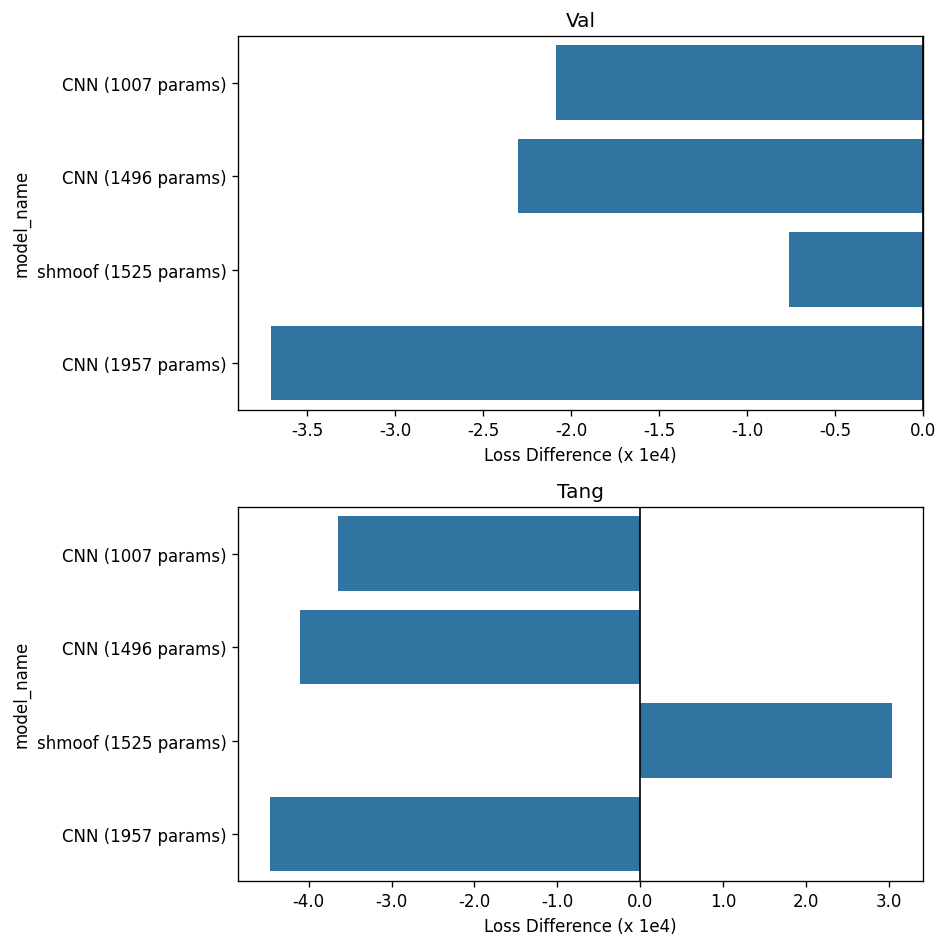

In [7]:
sub_expt_df = expt_df[expt_df["model_name"].isin(["hs_cnn_sml", "hs_cnn_med", "hs_cnn_lrg", "hs_fivemer", "hs_shmoof"])].copy()
sub_expt_df["model_name"] = sub_expt_df["model_name"].replace({"hs_cnn_sml": "CNN", "hs_cnn_med": "CNN", "hs_cnn_lrg": "CNN", "hs_shmoof": "shmoof"})

# append sub_expt_df["model_name"] with sub_expt_df["parameter_count"]
sub_expt_df["model_name"] = sub_expt_df["model_name"] + " (" + sub_expt_df["parameter_count"].astype(str) + " params)"

sub_expt_df["model_name"]

fig = experiment.plot_loss_difference(sub_expt_df, baseline_model_name='hs_fivemer (1025 params)')
fig.savefig(figures_dir + "netam_shm_model_comparison.svg", bbox_inches="tight")

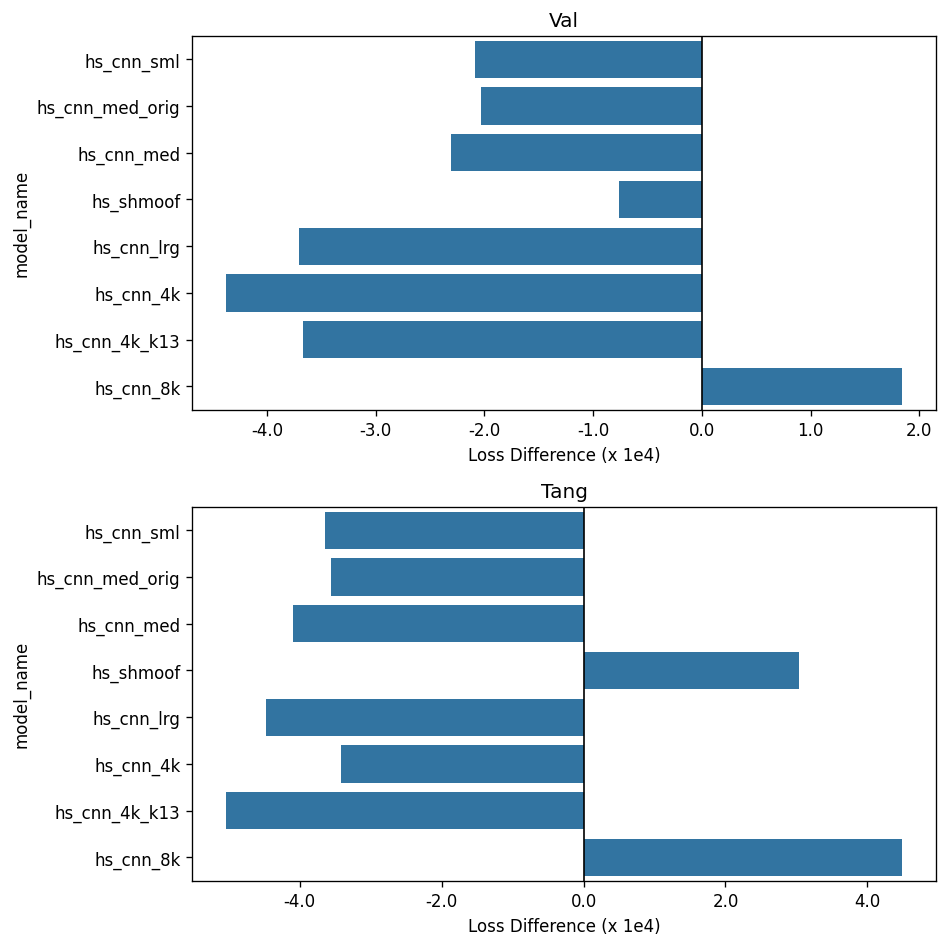

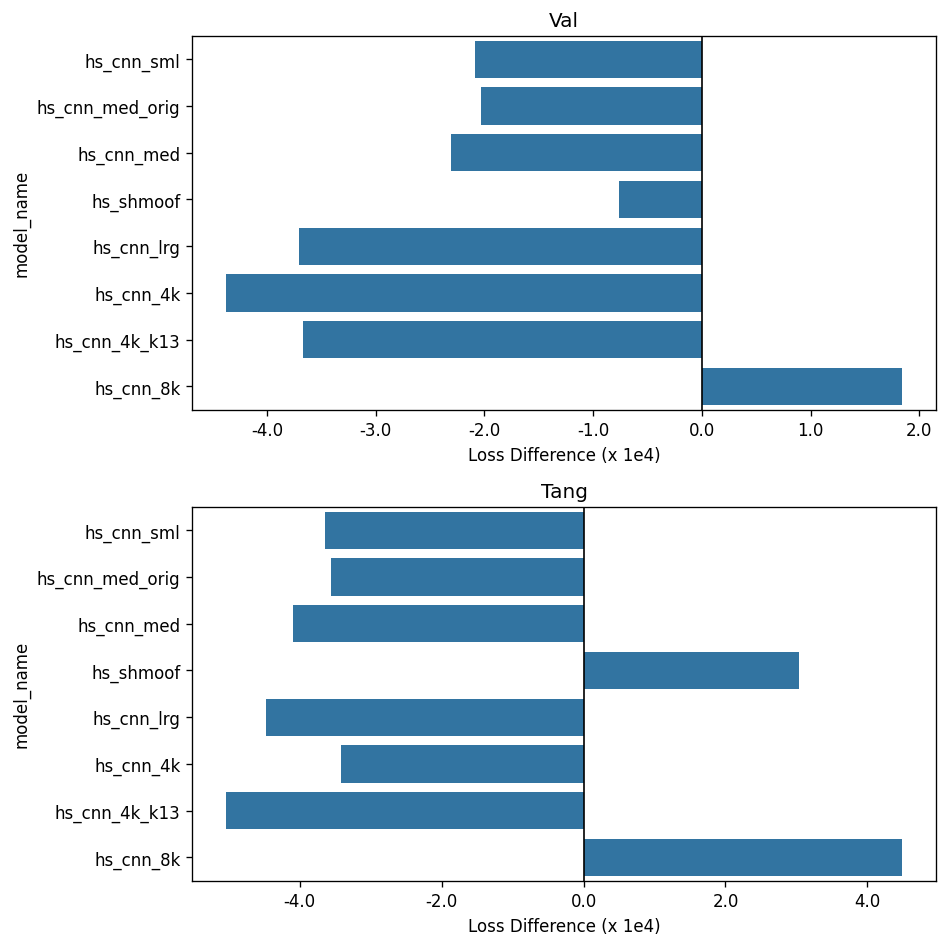

In [8]:
experiment.plot_loss_difference(expt_df, baseline_model_name='hs_fivemer')

In [9]:
# stop execution

assert False

AssertionError: 

In [ ]:
fivemer_df = comparison_df[comparison_df['model_name'] == 'fivemer']
fivemer_df = fivemer_df[['model_name', 'model', 'parameter_count', 'kmer_length']]
hyperparam_rows = []

for l2_regularization_coeff in [1e-7, 5e-7, 1e-6, 5e-6, 1e-5]:
    for model_name in ['cnn_lrg', 'cnn_4k']:
        my_params = deepcopy(burrito_params)
        my_params['l2_regularization_coeff'] = l2_regularization_coeff
        model = deepcopy(model_instances_3[model_name])
        model.to(device)
        burrito = framework.SHMBurrito(train_dataset_3, val_dataset_3, model, verbose=False, **burrito_params)
        train_history = burrito.train(epochs=100)
        hyperparam_rows.append({
            'model_name': f'{model_name}_l2_{l2_regularization_coeff}',
            'model': model,
            'parameter_count': parameter_count_of_model(model),
            'kmer_length': model.kmer_length,
        })

hyperparam_df = pd.concat([fivemer_df, pd.DataFrame(hyperparam_rows)], ignore_index=True)


In [ ]:
hyperparam_df["val_loss"] = loss_of_dataset_dict(hyperparam_df, val_data_by_kmer_length)
hyperparam_df["tang_loss"] = loss_of_dataset_dict(hyperparam_df, tang_data_by_kmer_length)

hyperparam_df

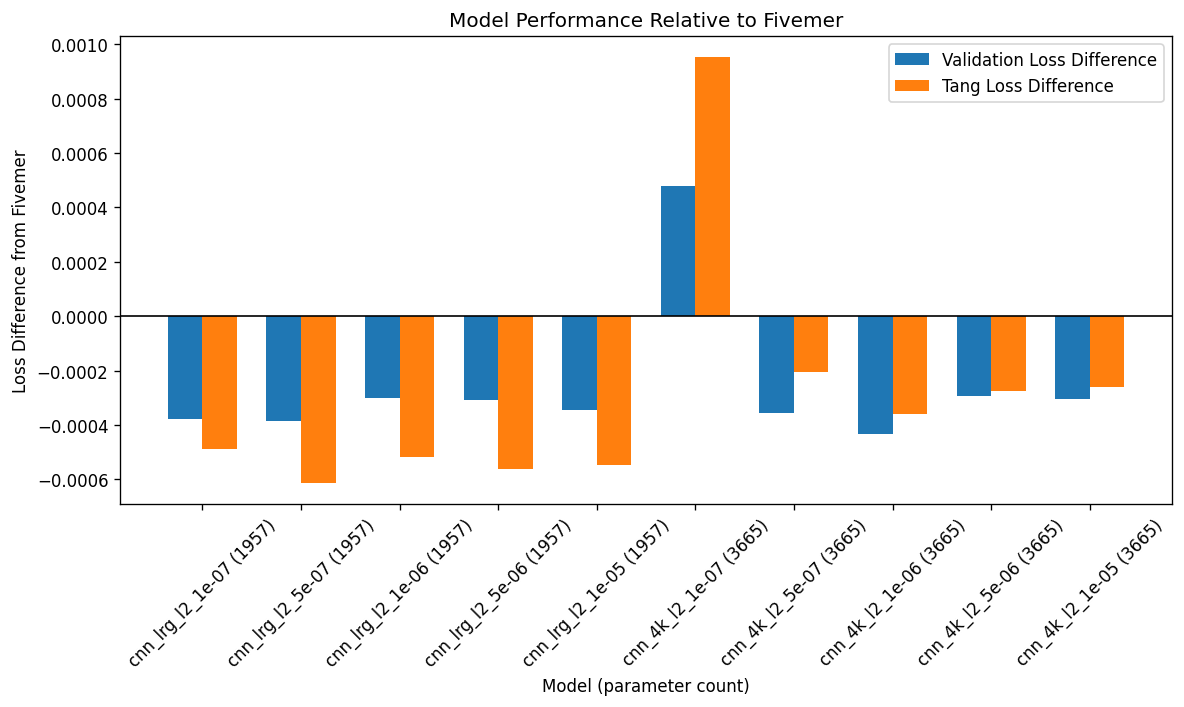

In [ ]:
plot_comparison(hyperparam_df)

In [ ]:
fivemer_df = comparison_df[comparison_df['model_name'] == 'fivemer']
fivemer_df = fivemer_df[['model_name', 'model', 'parameter_count', 'kmer_length']]
hyperparam_rows = []

for min_learning_rate in [1e-4, 1e-5, 1e-6]:
    for model_name in ['cnn_lrg']:
        my_params = deepcopy(burrito_params)
        my_params['min_learning_rate'] = min_learning_rate
        model = deepcopy(model_instances_3[model_name])
        model.to(device)
        burrito = framework.SHMBurrito(train_dataset_3, val_dataset_3, model, verbose=False, **burrito_params)
        train_history = burrito.train(epochs=100)
        hyperparam_rows.append({
            'model_name': f'{model_name}_min_lr_{min_learning_rate}',
            'model': model,
            'parameter_count': parameter_count_of_model(model),
            'kmer_length': model.kmer_length,
        })

min_lr_df = pd.concat([fivemer_df, pd.DataFrame(hyperparam_rows)], ignore_index=True)


Epoch:  41%|████      | 41/100 [06:24<09:13,  9.38s/it, loss_diff=1.202e-07, lr=3.2e-5]  


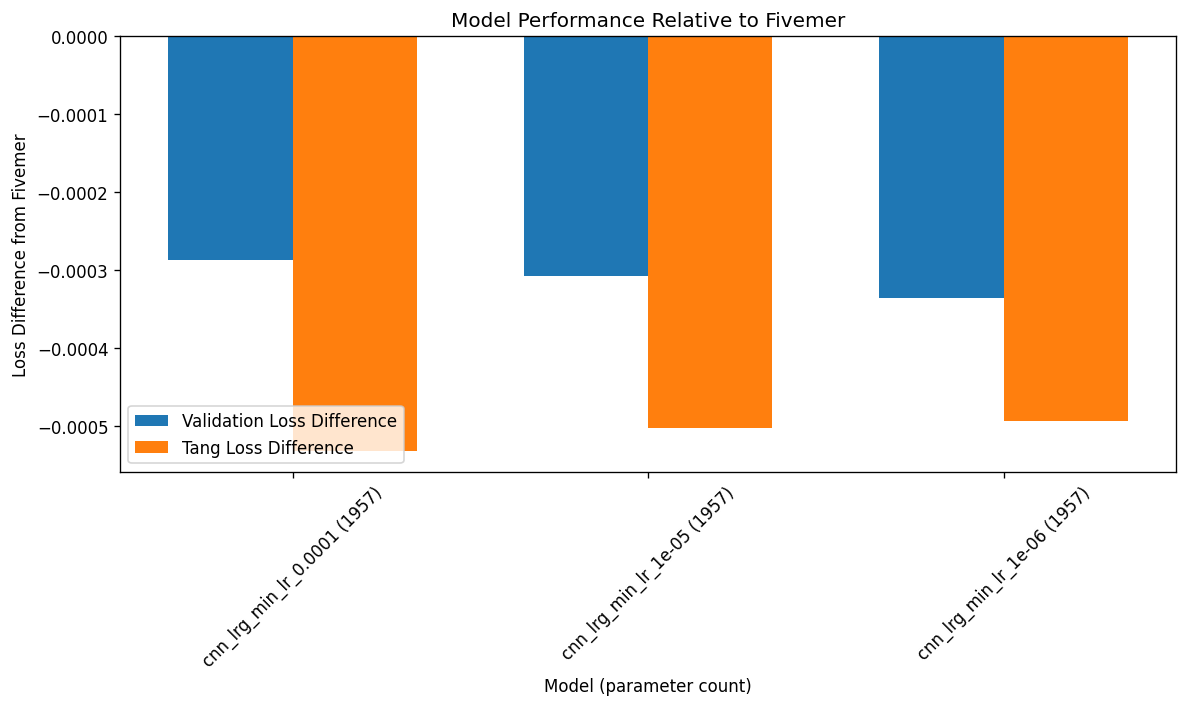

In [ ]:
min_lr_df["val_loss"] = loss_of_dataset_dict(min_lr_df, val_data_by_kmer_length)
min_lr_df["tang_loss"] = loss_of_dataset_dict(min_lr_df, tang_data_by_kmer_length)

plot_comparison(min_lr_df)